In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hawk-the-log/Sample submission .csv
/kaggle/input/hawk-the-log/train_data.csv
/kaggle/input/hawk-the-log/test_data.csv


In [2]:
train=pd.read_csv('/kaggle/input/hawk-the-log/train_data.csv')

In [3]:
test=pd.read_csv('/kaggle/input/hawk-the-log/test_data.csv')

In [4]:
train['dissatisfaction'].value_counts()

0    335595
1      4005
Name: dissatisfaction, dtype: int64

In [5]:
test['dissatisfaction'].value_counts()

0    109187
1      1213
Name: dissatisfaction, dtype: int64

In [6]:
train.isnull().sum()

order_id                    0
gender                      0
order_time                  0
allot_time                  0
pickup_time              1884
delivered_time           4004
transport_id                0
first_mile_distance         0
last_mile_distance          0
alloted_orders          12976
delivered_orders        13281
customer_care_calls        28
membership                  0
product_importan            0
lifetime_order_count       40
undelivered_orders      13281
dissatisfaction             0
dtype: int64

In [7]:
test.isnull().sum()

order_id                   0
gender                     0
order_time                 0
allot_time                 0
pickup_time              536
delivered_time          1213
transport_id               0
first_mile_distance        0
last_mile_distance         0
alloted_orders          3972
delivered_orders        4060
customer_care_calls        0
membership                 0
product_importan           0
lifetime_order_count      13
undelivered_orders      4060
dissatisfaction            0
dtype: int64

In [8]:
df=pd.concat([train,test],axis=0)

In [9]:
df[df['dissatisfaction']==1].isnull().sum()

order_id                   0
gender                     0
order_time                 0
allot_time                 0
pickup_time             2420
delivered_time          5217
transport_id               0
first_mile_distance        0
last_mile_distance         0
alloted_orders           649
delivered_orders         855
customer_care_calls        0
membership                 0
product_importan           0
lifetime_order_count      51
undelivered_orders       855
dissatisfaction            0
dtype: int64

In [10]:
df

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction
0,1003450,M,26-01-2021 02:21,26-01-2021 02:21,26-01-2021 02:32,26-01-2021 02:49,11696,15.666,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0
1,1003451,F,26-01-2021 02:33,26-01-2021 02:33,26-01-2021 02:50,26-01-2021 03:11,18117,25.207,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0
2,1003452,M,26-01-2021 02:39,26-01-2021 02:39,26-01-2021 02:56,26-01-2021 03:12,18623,22.074,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0
3,1003453,M,26-01-2021 02:47,26-01-2021 02:48,26-01-2021 03:21,26-01-2021 03:41,15945,21.894,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0
4,1003454,F,26-01-2021 03:06,26-01-2021 03:07,26-01-2021 03:31,26-01-2021 04:00,17589,27.870,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110395,1453445,F,06-02-2021 10:03,06-02-2021 10:03,06-02-2021 10:27,06-02-2021 10:44,1006,5.789,2.85,4.0,4.0,5.0,Normal,other,127.0,0.0,0
110396,1453446,M,06-02-2021 10:03,06-02-2021 10:03,06-02-2021 10:22,06-02-2021 10:31,279,19.863,17.85,81.0,81.0,3.0,Prime,low,105.0,0.0,0
110397,1453447,F,06-02-2021 10:03,06-02-2021 10:04,06-02-2021 10:19,06-02-2021 10:26,3161,15.944,24.15,28.0,28.0,4.0,Normal,high,1488.0,0.0,0
110398,1453448,M,06-02-2021 10:03,06-02-2021 10:03,06-02-2021 10:20,06-02-2021 10:30,9396,28.939,70.20,72.0,72.0,1.0,Prime,high,105.0,0.0,0


In [11]:
df['dissatisfaction'].value_counts()

0    444782
1      5218
Name: dissatisfaction, dtype: int64

In [12]:
df['alloted_orders'] = df['alloted_orders'].fillna(df['alloted_orders'].mode())
df['delivered_orders'] = df['delivered_orders'].fillna(df['delivered_orders'].mode())
df['customer_care_calls'] = df['customer_care_calls'].fillna(df['customer_care_calls'].mode())
df['lifetime_order_count'] = df['lifetime_order_count'].fillna(df['lifetime_order_count'].mode())
df['undelivered_orders'] = df['undelivered_orders'].fillna(df['undelivered_orders'].mode())

In [13]:
test['delivered_orders'] = test['delivered_orders'].fillna(test['delivered_orders'].mode())
test['undelivered_orders'] = test['undelivered_orders'].fillna(test['undelivered_orders'].mode())
test['alloted_orders'] = test['alloted_orders'].fillna(test['alloted_orders'].mode())
test['lifetime_order_count'] = test['lifetime_order_count'].fillna(test['lifetime_order_count'].mode())

In [14]:
df[df['dissatisfaction']==1]

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction
20,1003470,M,26-01-2021 03:28,26-01-2021 04:09,27-01-2021 03:59,27-01-2021 04:15,12885,28.438,102.15,29.0,29.0,2.0,Normal,low,449.0,0.0,1
68,1003518,F,26-01-2021 03:45,26-01-2021 03:45,NaN,NaN,17557,8.617,39.45,13.0,13.0,4.0,Prime,high,168.0,0.0,1
100,1003550,M,26-01-2021 03:54,26-01-2021 05:29,NaN,NaN,2391,29.217,78.00,118.0,114.0,4.0,Normal,high,860.0,4.0,1
163,1003613,F,26-01-2021 04:11,26-01-2021 04:12,NaN,NaN,15229,21.287,6.75,55.0,52.0,1.0,Normal,low,256.0,3.0,1
295,1003745,M,26-01-2021 04:39,26-01-2021 04:39,NaN,NaN,2373,16.053,72.60,104.0,104.0,5.0,Prime,high,3282.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110138,1453188,M,06-02-2021 09:50,06-02-2021 10:42,NaN,NaN,3027,17.963,30.00,215.0,214.0,4.0,Normal,high,975.0,1.0,1
110322,1453372,F,06-02-2021 09:59,06-02-2021 10:00,06-02-2021 10:19,NaN,2344,22.022,38.40,89.0,88.0,1.0,Normal,low,176.0,1.0,1
110328,1453378,M,06-02-2021 09:59,06-02-2021 09:59,06-02-2021 10:09,NaN,11998,16.601,112.50,314.0,312.0,5.0,Normal,high,437.0,2.0,1
110332,1453382,F,06-02-2021 09:59,06-02-2021 10:04,NaN,NaN,2583,9.083,125.85,106.0,106.0,2.0,Prime,low,133.0,0.0,1


In [15]:
df=df.drop(columns=['pickup_time','delivered_time'])
test=test.drop(columns=['pickup_time','delivered_time'])

In [16]:
df.order_time=pd.to_datetime(df.order_time)
df.allot_time=pd.to_datetime(df.allot_time)
test.order_time=pd.to_datetime(test.order_time)
test.allot_time=pd.to_datetime(test.allot_time)

In [17]:
df['order_allot_time']=df['allot_time']-df['order_time']
df['order_allot_time']=df['order_allot_time'].dt.total_seconds()
test['order_allot_time']=test['allot_time']-test['order_time']
test['order_allot_time']=test['order_allot_time'].dt.total_seconds()


In [18]:
df=df.drop(columns=['order_time','allot_time'])
test=test.drop(columns=['order_time','allot_time'])

In [19]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['gender']=Le.fit_transform(df['gender'])
df['membership']=Le.fit_transform(df['membership'])
df['product_importan']=Le.fit_transform(df['product_importan'])
test['gender']=Le.fit_transform(test['gender'])
test['membership']=Le.fit_transform(test['membership'])
test['product_importan']=Le.fit_transform(test['product_importan'])


In [20]:
df['dissatisfaction'].value_counts()

0    444782
1      5218
Name: dissatisfaction, dtype: int64

<AxesSubplot:>

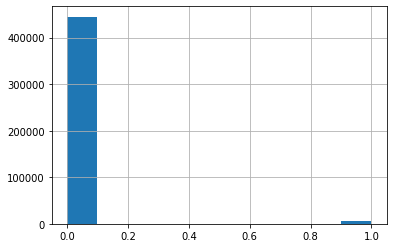

In [21]:
import seaborn as sns
df['dissatisfaction'].hist(grid='False')

In [22]:
df['dissatisfaction'].skew()

9.124265739121313

In [23]:
df['total_distance']=df['first_mile_distance']+df['last_mile_distance']
df['orders_count']=df['alloted_orders']-df['delivered_orders']
df=df.drop(columns=['first_mile_distance','last_mile_distance','alloted_orders','delivered_orders'])
test['total_distance']=test['first_mile_distance']+test['last_mile_distance']
test['orders_count']=test['alloted_orders']-test['delivered_orders']
test=test.drop(columns=['first_mile_distance','last_mile_distance','alloted_orders','delivered_orders'])


In [24]:
df['dissatisfaction'].value_counts()

0    444782
1      5218
Name: dissatisfaction, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_distance', ylabel='Density'>

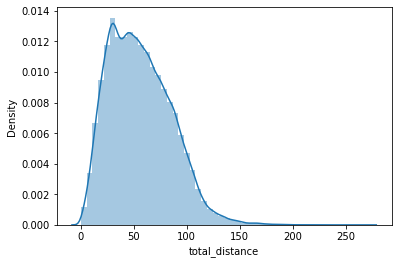

In [25]:
sns.distplot(test['total_distance'],hist=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_distance', ylabel='Density'>

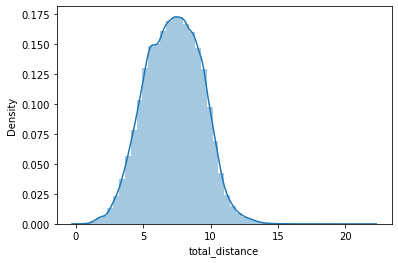

In [26]:
sns.distplot(np.sqrt(df['total_distance']),hist=True)



In [27]:
df

,order_id,gender,transport_id,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,order_allot_time,total_distance,orders_count
0,1003450,1,11696,5.0,0,1,621.0,0.0,0,0.0,55.416,0.0
1,1003451,0,18117,4.0,1,2,105.0,0.0,0,0.0,66.607,0.0
2,1003452,1,18623,2.0,0,2,66.0,0.0,0,0.0,94.074,0.0
3,1003453,1,15945,5.0,1,1,127.0,0.0,0,60.0,117.594,0.0
4,1003454,0,17589,0.0,0,1,84.0,0.0,0,60.0,88.020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110395,1453445,0,1006,5.0,0,2,127.0,0.0,0,0.0,8.639,0.0
110396,1453446,1,279,3.0,1,1,105.0,0.0,0,0.0,37.713,0.0
110397,1453447,0,3161,4.0,0,0,1488.0,0.0,0,60.0,40.094,0.0
110398,1453448,1,9396,1.0,1,0,105.0,0.0,0,0.0,99.139,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_care_calls', ylabel='Density'>

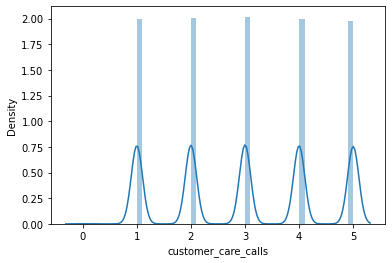

In [28]:
sns.distplot(df['customer_care_calls'],hist=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifetime_order_count', ylabel='Density'>

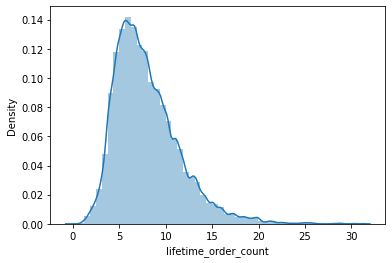

In [29]:
sns.distplot(np.cbrt(df['lifetime_order_count']),hist=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifetime_order_count', ylabel='Density'>

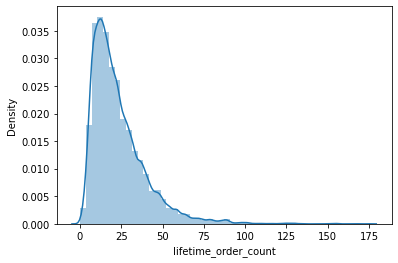

In [30]:
sns.distplot(np.sqrt(test['lifetime_order_count']),hist=True)

In [31]:
#target_0 = df.loc[df.dissatisfaction==0].sample(5218)
#target_1 =  df.loc[df.dissatisfaction==1]
#feature = pd.concat([target_0,target_1]).sample(frac = 1.)
feature=df

In [32]:
features=feature.drop(columns=['dissatisfaction'])

In [33]:
target=feature['dissatisfaction']

In [34]:
1/(np.sum(df['dissatisfaction'])/len(df['dissatisfaction']))

86.23993867382138

In [35]:
from xgboost import XGBClassifier
model=XGBClassifier(scale_pos_weight=87)
model.fit(features,target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
xtest=test.drop(columns=['dissatisfaction'])
ytest=test['dissatisfaction']

In [37]:
test['dissatisfaction'].value_counts()

0    109187
1      1213
Name: dissatisfaction, dtype: int64

In [38]:
xtest

,order_id,gender,transport_id,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,order_allot_time,total_distance,orders_count
0,1343050,1,14480,4,0,2,357.0,2.0,0.0,51.809,2.0
1,1343051,0,14594,2,1,2,253.0,0.0,0.0,80.647,0.0
2,1343052,0,5486,2,1,2,2229.0,4.0,0.0,40.743,4.0
3,1343053,0,11578,3,1,1,161.0,0.0,0.0,44.388,0.0
4,1343054,0,2322,1,0,1,65.0,0.0,0.0,55.901,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110395,1453445,0,1006,5,0,2,127.0,0.0,0.0,8.639,0.0
110396,1453446,1,279,3,1,1,105.0,0.0,0.0,37.713,0.0
110397,1453447,0,3161,4,0,0,1488.0,0.0,60.0,40.094,0.0
110398,1453448,1,9396,1,1,0,105.0,0.0,0.0,99.139,0.0


In [39]:
predicted=model.predict(xtest)

In [40]:
from sklearn import metrics
metrics.accuracy_score(ytest,predicted)

0.8988949275362319

In [41]:
my_submission = pd.DataFrame({'order_id': test.order_id, 'dissatisfaction': predicted})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [42]:
my_submission['dissatisfaction'].value_counts()

0    98647
1    11753
Name: dissatisfaction, dtype: int64